# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
from scipy.stats import norm

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

(array([208., 174., 154., 140., 139., 119.,  55.,  32.,  42.,  36.,  23.,
         27.,  16.,  16.,   3.,  15.,  22.,  22.,  22.,  19.,  16.,  14.,
         16.,   2.,   1.,   1.,   0.,   1.,   1.,   2.]),
 array([ 1121.8739  ,  3210.159037,  5298.444174,  7386.729311,
         9475.014448, 11563.299585, 13651.584722, 15739.869859,
        17828.154996, 19916.440133, 22004.72527 , 24093.010407,
        26181.295544, 28269.580681, 30357.865818, 32446.150955,
        34534.436092, 36622.721229, 38711.006366, 40799.291503,
        42887.57664 , 44975.861777, 47064.146914, 49152.432051,
        51240.717188, 53329.002325, 55417.287462, 57505.572599,
        59593.857736, 61682.142873, 63770.42801 ]),
 <a list of 30 Patch objects>)

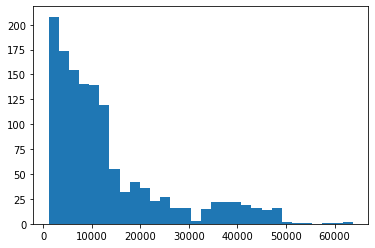

In [4]:
plt.hist(medical.charges, bins=30)

In [5]:
print('The mean of Charges :', np.mean(medical.charges))
print('The standard deviation of Charges :', np.std(medical.charges))

The mean of Charges : 13270.422265141257
The standard deviation of Charges : 12105.484975561612


In [6]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The most appropriate frequentist test in this case would be one-tailed hypothesis testing as one-tailed test allots the alpha value, testing the statistical significance in one direction of interest i.e has charge fallen below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided interval best suits the problem.

In [7]:
# to find z critical value for 95% confidence
cval = round(norm.ppf(0.975),2)
print('The critical z value is :', cval)

The critical z value is : 1.96


In [8]:

# to find z critical value for 5% confidence
cval1 = round(norm.ppf(0.025),2)
print('The critical z value is :', cval1)



The critical z value is : -1.96


In [9]:
# calculate standard error of the sample
char_std = np.std(medical.charges)   # calculate std of charges
char_mean = np.mean(medical.charges) # calculate mean of charges
se = round((char_std / np.sqrt(len(medical.charges))),2)
print('The Standard Error is :',se)

The Standard Error is : 330.94


In [10]:
# calculate margin of error
me = cval * se
print('The Margin of Error for 95% confidence levels :', me)

The Margin of Error for 95% confidence levels : 648.6424


In [11]:

# calculate margin of error for 5%
me1 = cval1 * se
print('The Margin of Error for 95% confidence levels :', me1)



The Margin of Error for 95% confidence levels : -648.6424


In [12]:
lmean = char_mean - me
umean = char_mean + me
print('The 95% Confidence Intervals of the mean less than {} '.format(round(lmean,2)))
print('The 95% Confidence Intervals of the mean lie between {} and {}'.format(round(lmean,2), round(umean,2)))

The 95% Confidence Intervals of the mean less than 12621.78 
The 95% Confidence Intervals of the mean lie between 12621.78 and 13919.06


In [13]:
lmean1 = char_mean - abs(me1)

print('The 5% Confidence Intervals of the mean less than {} '.format(round(lmean1,2)))


The 5% Confidence Intervals of the mean less than 12621.78 


In [14]:
z = (12000 - char_mean)/se
print('The z value for charges of 12000 is :', z)

The z value for charges of 12000 is : -3.8388295918935653


In [15]:
alpha = round(norm.ppf(0.05),2)
alpha1 = round(norm.ppf(0.025),2)
print('The significance value set at 0.05 is {} and 0.025 is {}'.format(alpha,alpha1))

The significance value set at 0.05 is -1.64 and 0.025 is -1.96


In [16]:
x = ((alpha * se) + char_mean)
x, alpha, se, char_mean

(12727.680665141257, -1.64, 330.94, 13270.422265141257)

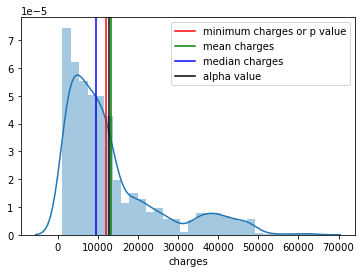

In [17]:
import seaborn as sns
sns.distplot(medical.charges)
plt.axvline(12000, color='r', label='minimum charges or p value')
plt.axvline(char_mean, color='g',label='mean charges')
plt.axvline(np.median(medical.charges), color='b', label='median charges')
plt.axvline(x, color='k', label='alpha value')
plt.legend()
plt.show()

In [18]:
z1 = (12000 - char_mean)/char_std
print('The z value for charges of 12000 is :', z1)

The z value for charges of 12000 is : -0.10494600321308627


In [19]:
x1 = ((z1 * char_std) + char_mean)
x1,z1

(12000.0, -0.10494600321308627)

In [20]:
x2 = ((z1 * se) + char_mean)
x2,z1

(13235.691434837918, -0.10494600321308627)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  The Pooled Standard Deviation of the two groups is : 11512.28

A: The t-test statistic is : -0.03664342202081877

### Null Hypothesis H0 states that there is no difference in charges whether people had insurance or not
### Alternate Hypothesis H1 states that there is a significant difference in charges with insured and uninsured people

In [21]:
medical[['insuranceclaim','charges']]

,insuranceclaim,charges
0,1,16884.92400
1,1,1725.55230
2,0,4449.46200
3,0,21984.47061
4,1,3866.85520
...,...,...
1333,0,10600.54830
1334,1,2205.98080
1335,1,1629.83350
1336,0,2007.94500


In [22]:
xin = medical['charges'][medical.insuranceclaim==1]   # x denotes medical charges who claimed insurance
x1 = np.mean(xin)   # x1 denotes mean of medical charges with insurance claim
s1 = np.std(xin)    # s1 denotes std of medical charges with insurance claim
n1 = len(xin)       # n1 denotes no of samples who claimed insurance
print('The Mean and Standard Deviation of charges who claimed insurance are {} and {} respectively:'.format(x1, s1))

The Mean and Standard Deviation of charges who claimed insurance are 16423.928276537677 and 14036.956250260417 respectively:


In [23]:
xin.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

(array([234., 232.,  84.,  60.,  24.,  54.,  57.,  32.,   2.,   4.]),
 array([ 1131.5066  ,  7395.398741, 13659.290882, 19923.183023,
        26187.075164, 32450.967305, 38714.859446, 44978.751587,
        51242.643728, 57506.535869, 63770.42801 ]),
 <a list of 10 Patch objects>)

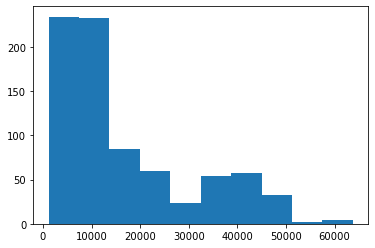

In [24]:
plt.hist(xin)

In [25]:
xno = medical['charges'][medical.insuranceclaim==0]  # xno denotes medical charges without insurance
x0 = np.mean(xno)        # x0 denotes mean of medical charges without insurance
s0 = np.std(xno)         # s0 denotes std of medical charges without insurance
n0 = len(xno)            # n0 denotes no of persons who didn't claimed insurance
print('The Mean and Standard Deviation of charges without insurance are {} and {} respectively:'.format(x0, s0))

The Mean and Standard Deviation of charges without insurance are 8821.421892306305 and 6440.699841605235 respectively:


In [26]:
xno.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

(array([157., 170., 101.,  56.,  23.,  20.,  12.,   9.,   4.,   3.]),
 array([ 1121.8739  ,  4700.747313,  8279.620726, 11858.494139,
        15437.367552, 19016.240965, 22595.114378, 26173.987791,
        29752.861204, 33331.734617, 36910.60803 ]),
 <a list of 10 Patch objects>)

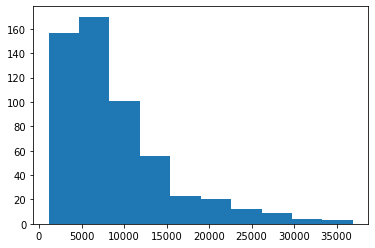

In [27]:
plt.hist(xno)

In [28]:
p_std = np.sqrt(np.sum(((n1-1)*(s1**2), (n0-1) * (s0**2)), dtype=np.float64) / (n0 + n1 -2))
print('The Pooled Standard Deviation of the two groups is :', round(p_std,2))

The Pooled Standard Deviation of the two groups is : 11512.28


In [29]:
t = (x0 - x1)/ (p_std* np.sqrt((1/n0)+(1/n1)))
print('The t-test statistic is :', t)

The t-test statistic is : -11.901306943555388


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [30]:
from scipy import stats
p = stats.t.cdf(t,df=c)
print('The p-value is:', p * 2)

NameError: name 'c' is not defined

In [ ]:
if (pi *2  < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

In [ ]:
t2, p2 = stats.ttest_ind(xno,xin)
t2,p2

In [ ]:
print("The manually calculated t-test statistic is {} and p-value is {}".format(t,p*2))
print("The scipy.stats calculated t-test statistic is {} and p-value is {}".format(t2,p2))

### Both the values are same

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ 
scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')

scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')

Both are similar but where sample size is more than 50 and population variance is known, z test is used and for smaller samples less than 50 and population variance is unknown, t test is used

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test